In [1]:
import pandas as pd

In [2]:
data_path = '../datasets/preprocessing/'
# cn : 정상 -> target컬럼 0으로 변환
activity_cn_df = pd.read_csv(data_path+'activity_preprocessing_final_CN.csv').drop(['DIAG_NM','EMAIL'],axis=1)
activity_cn_df['target'] = [0 for i in range(len(activity_cn_df))]
activity_dem_df = pd.read_csv(data_path+'activity_preprocessing_final_Dem.csv').drop(['DIAG_NM','EMAIL'],axis=1)
activity_dem_df['target'] = [1 for i in range(len(activity_dem_df))]
sleep_cn_df = pd.read_csv(data_path+'sleep_preprocessing_final_CN.csv').drop(['DIAG_NM','EMAIL'],axis=1)
sleep_cn_df['target'] = [0 for i in range(len(sleep_cn_df))]
sleep_dem_df = pd.read_csv(data_path+'sleep_preprocessing_final_Dem.csv').drop(['DIAG_NM','EMAIL'],axis=1)
sleep_dem_df['target'] = [1 for i in range(len(sleep_dem_df))]

In [3]:
activity_df = pd.concat([activity_cn_df, activity_dem_df], ignore_index=True)

In [4]:
sleep_df = pd.concat([sleep_cn_df, sleep_dem_df], ignore_index=True)

In [5]:
def split_train_test(dataframe, target_colum:str, percent:float = 0.8):
    train_num = int(len(dataframe)*percent)

    x_df = dataframe.drop([target_colum], axis=1)
    y_df = dataframe[target_colum]

    train_idx = list(dataframe.sample(n=train_num).index)
    train_X = x_df.loc[train_idx].values
    train_y = y_df.loc[train_idx].values

    test_idx = list(filter(lambda x: x not in train_idx, list(dataframe.index)))
    test_X = x_df.loc[test_idx].values
    test_y = y_df.loc[test_idx].values
    return train_X, train_y, test_X, test_y

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def gef_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC_AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC_AUC print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [7]:
# 학습 진행
from lightgbm import LGBMClassifier

In [19]:
# 학습용, 테스트용 데이터 분류
train_X, train_y, test_X, test_y = split_train_test(sleep_df, 'target')

model_lightgbm = LGBMClassifier(n_estimators=300)
evals = [(test_X, test_y)]
model_lightgbm.fit(train_X, train_y)
preds = model_lightgbm.predict(test_X)
preds_proba = model_lightgbm.predict_proba(test_X)[:,1]

# 평가
gef_clf_eval(test_y, preds, preds_proba)

[LightGBM] [Info] Number of positive: 2674, number of negative: 4617
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2688
[LightGBM] [Info] Number of data points in the train set: 7291, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366754 -> initscore=-0.546170
[LightGBM] [Info] Start training from score -0.546170
오차 행렬
[[1065   99]
 [ 213  446]]
정확도:0.8289, 정밀도:0.8183, 재현율:0.6768, F1:0.7409, AUC:0.8900


### feature importance 계산
참고 : https://tbr74.tistory.com/entry/feature-importances-%ED%94%BC%EC%B3%90-%EC%A4%91%EC%9A%94%EB%8F%84

In [26]:
feature_importance = pd.Series(model_lightgbm.feature_importances_, index=sleep_df.drop(['target'], axis=1).columns)

In [27]:
feature_importance

sleep_awake                  531
sleep_breath_average         795
sleep_deep                   571
sleep_duration               398
sleep_hr_average            1098
sleep_light                  510
sleep_midpoint_at_delta      713
sleep_onset_latency          327
sleep_period_id              145
sleep_rem                    674
sleep_restless               558
sleep_rmssd                  782
sleep_score                  353
sleep_score_alignment        161
sleep_score_deep             251
sleep_score_disturbances     456
sleep_score_latency          150
sleep_temperature_delta      527
dtype: int32

In [28]:
model_lightgbm.booster_.feature_importance(importance_type="gain")

array([1787.33462462, 4864.76440644, 2132.07460088, 1157.95491078,
       6676.55521566, 2518.14453658, 3488.32389992,  987.16323557,
        470.03974867, 2998.22967553, 2364.56212492, 4634.61006132,
       1333.10569884,  579.08261353, 1337.73620361, 2033.79615474,
        438.33565336, 1566.79860508])

### feature importance 시각화
참고 : https://colinch4.github.io/2023-09-07/12-24-32-874527/

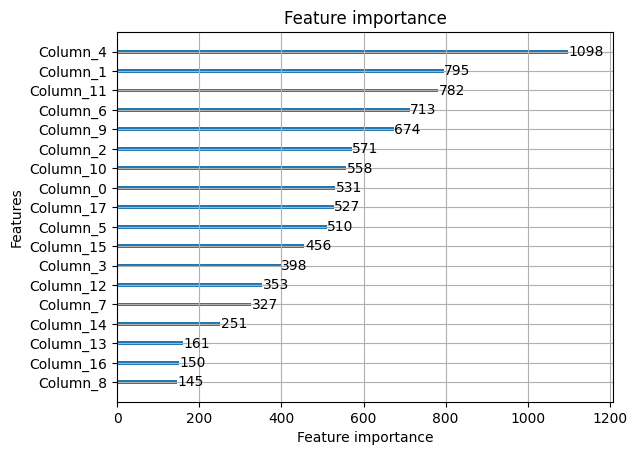

In [29]:
import matplotlib.pyplot as plt
import lightgbm as lgb

lgb.plot_importance(model_lightgbm)
plt.show()


In [14]:
# 학습용, 테스트용 데이터 분류
train_X, train_y, test_X, test_y = split_train_test(activity_df, 'target')

model_lightgbm = LGBMClassifier(n_estimators=300)
evals = [(test_X, test_y)]
model_lightgbm.fit(train_X, train_y)
preds = model_lightgbm.predict(test_X)
preds_proba = model_lightgbm.predict_proba(test_X)[:,1]

# 평가
gef_clf_eval(test_y, preds, preds_proba)

[LightGBM] [Info] Number of positive: 2661, number of negative: 3621
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2235
[LightGBM] [Info] Number of data points in the train set: 6282, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.423591 -> initscore=-0.308048
[LightGBM] [Info] Start training from score -0.308048
오차 행렬
[[704 195]
 [264 408]]
정확도:0.7078, 정밀도:0.6766, 재현율:0.6071, F1:0.6400, AUC:0.7780


In [18]:
import numpy as np
print('피쳐 목록:\n\t{0}'.format(list(activity_df.columns)))
print("피쳐 중요도:\n\t{0}".format(np.round(model_lightgbm.feature_importances_, 2)))

피쳐 목록:
	['activity_cal_total', 'activity_high', 'activity_inactive', 'activity_low', 'activity_medium', 'activity_met_min_inactive', 'activity_non_wear', 'activity_rest', 'activity_score', 'activity_score_meet_daily_targets', 'activity_score_move_every_hour', 'activity_score_recovery_time', 'activity_score_training_frequency', 'activity_score_training_volume', 'activity_steps', 'activity_total', 'target']
피쳐 중요도:
	[960 407 818 854 856 547 537 884 547 228 102 177 149 488 787 659]
